# Modelos predictivos de Arboles de decisión 

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
3. Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.
4. Dividir el dataset en Train y Test para evaluar correctamente el m delo.
5. Entrenar el modelo configurando los diferentes hiperpar metros.
6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.
7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
8. Interpretar, analizar y documentar los resultados obtenidos..

In [69]:
# Cargar Las Librerias necesarias
import pandas as pd               # type: ignore # Para manejar datos en formato de DataFrame
import numpy as np                # type: ignore # Para operaciones numéricas
import seaborn as sns             # type: ignore # Para visualización de datos estadísticos
import matplotlib.pyplot as plt   # type: ignore # Para crear gráficos y visualizaciones

# Librerías de para implementar modelos de ciencia de datos
from sklearn import metrics                    # type: ignore # Para métricas de evaluación de modelos
from sklearn.model_selection import train_test_split   # type: ignore # Para dividir los datos en conjuntos de entrenamiento y prueba
from sklearn.tree import DecisionTreeClassifier, plot_tree   # type: ignore # Para construir un clasificador de árbol de decisión
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc   # type: ignore # Para evaluar el desempeño del modelo


# Punto 1. 
Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.


In [70]:
# Lectura de datos desde un archivo CSV utilizando pandas
Datos = pd.read_csv('./winequality-red.csv')

In [71]:
# Mostrar las primeras 50 filas de los datos
Datos.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


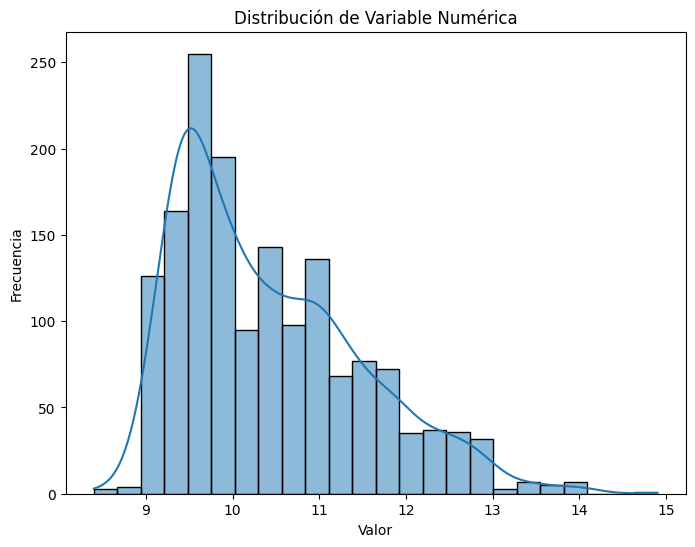

In [72]:
# Visualización de la distribución de una variable numérica
plt.figure(figsize=(8, 6))
sns.histplot(Datos['alcohol'], kde=True)
plt.title('Distribución de Variable Numérica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

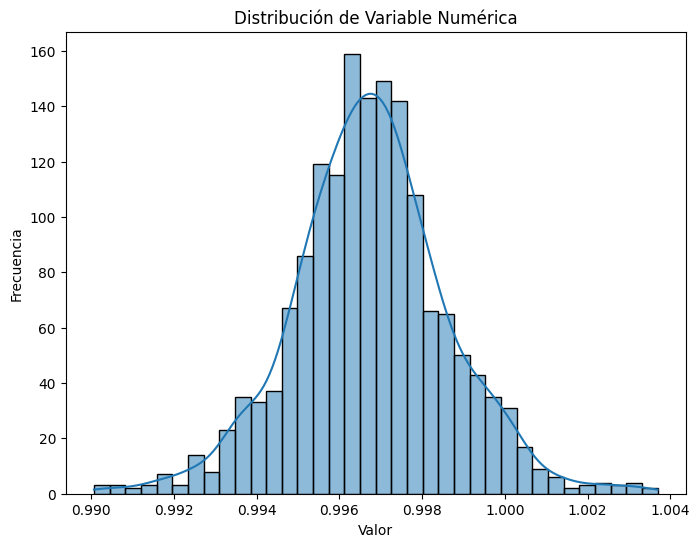

In [73]:
# Visualización de la distribución de una variable numérica
plt.figure(figsize=(8, 6))
sns.histplot(Datos['density'], kde=True)
plt.title('Distribución de Variable Numérica')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

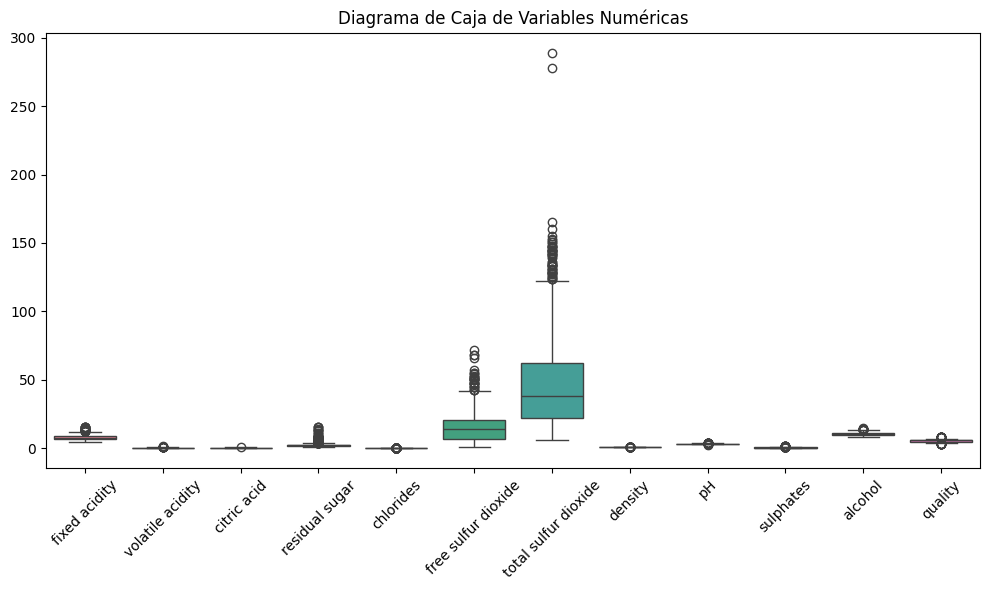

In [74]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

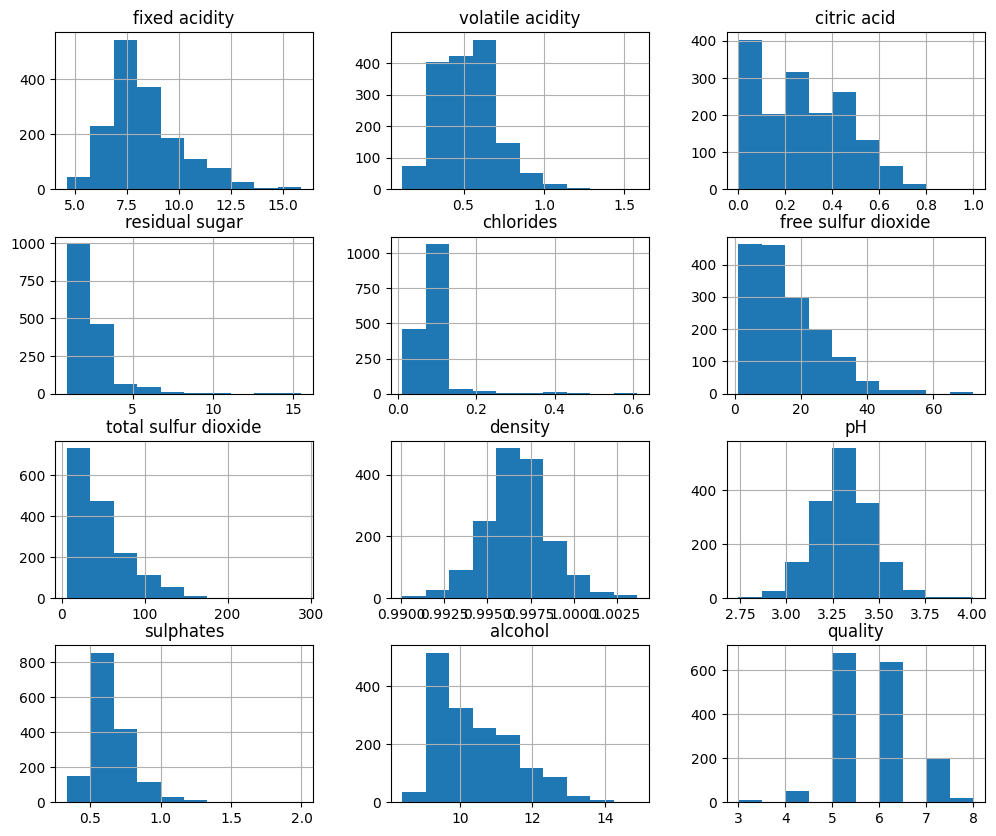

In [75]:
Datos.hist(figsize=(12, 10))
plt.show()

# Punto 2.
Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.


In [76]:
# Verificar si hay valores faltantes
valores_faltantes = Datos.isnull().sum()
print(valores_faltantes)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [77]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((Datos < (Q1 - 1.5 * IQR)) | (Datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      30
total sulfur dioxide     55
density                  45
pH                       35
sulphates                59
alcohol                  13
quality                  28
dtype: int64


In [78]:
# Definir los niveles mínimo y máximo de referencia para cada variable
niveles_referencia = {
    'fixed acidity': {'min': 6.0, 'max': 10.0},
    'volatile acidity': {'min': 0.05, 'max': 0.7},
    'citric acid': {'min': 0.05, 'max': 0.7},
    'residual sugar': {'min': 0.0, 'max': 4.5},
    'chlorides': {'min': 0.0, 'max': 0.07},
    'free sulfur dioxide': {'min': 0.0, 'max': 20.0},
    'total sulfur dioxide': {'min': 0.0, 'max': 60.0},
    'density': {'min': 0.992, 'max': 0.997},
    'pH': {'min': 3.0, 'max': 3.5},
    'sulphates': {'min': 0.3, 'max': 1.1},
    'alcohol': {'min': 9.7, 'max': 12.8},
    'quality': {'min': 2, 'max': 9}
    }

# Conteo de Datos Atípicos y eliminación
for variable, valores_referencia in niveles_referencia.items():
    nivel_minimo = valores_referencia['min']
    nivel_maximo = valores_referencia['max']
    total_atipicos = ((Datos[variable] < nivel_minimo) | (Datos[variable] > nivel_maximo)).sum()
    Datos = Datos[(Datos[variable] >= nivel_minimo) & (Datos[variable] <= nivel_maximo)]


In [79]:
#conteo de datos atipicos

# Calcular el rango intercuartílico (IQR)
Q1 = Datos.quantile(0.25)
Q3 = Datos.quantile(0.75)
IQR = Q3 - Q1

# Identificar datos atípicos para cada columna
datos_atipicos = ((Datos < (Q1 - 1.5 * IQR)) | (Datos > (Q3 + 1.5 * IQR))).sum()

# Mostrar el conteo de datos atípicos por columna
print("Datos atípicos por columna:")
print(datos_atipicos)

Datos atípicos por columna:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          6
chlorides               5
free sulfur dioxide     0
total sulfur dioxide    1
density                 0
pH                      0
sulphates               1
alcohol                 0
quality                 2
dtype: int64


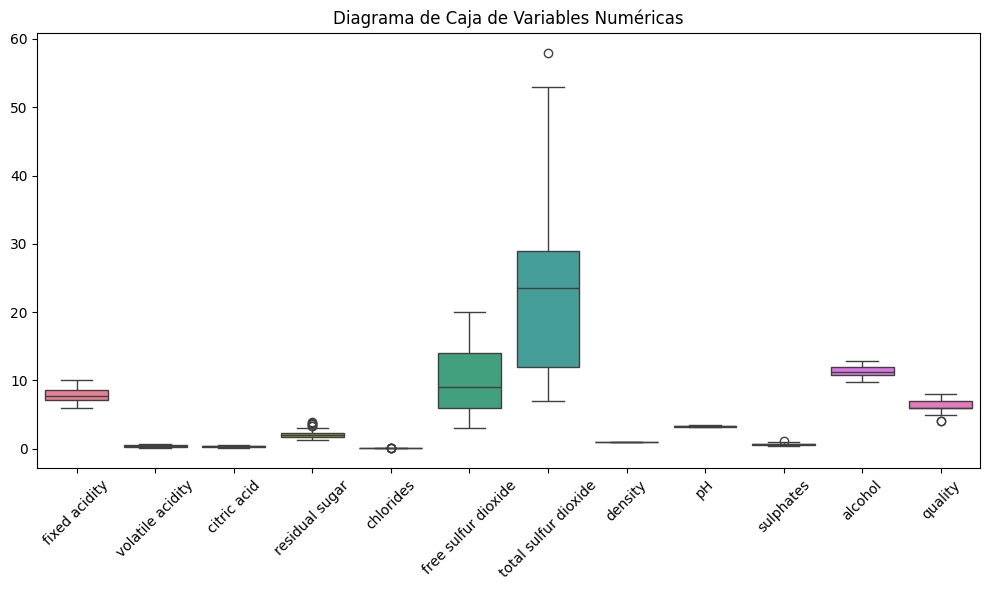

In [80]:
# Ajusta el tamaño de la figura
plt.figure(figsize=(10, 6))

# Diagramas de caja para variables numéricas
sns.boxplot(data=Datos)
plt.title('Diagrama de Caja de Variables Numéricas')
plt.xticks(rotation=45) #rotar 45 grados los nombres del eje x
# Ajusta el espaciado entre los elementos en el eje y
plt.tight_layout()

plt.show()

# Punto 3.
Seleccionar las características más relevantes para entren el 3 modelo utilizando selección de características.


In [81]:
# calidad del vino
Datos['quality'].value_counts()

quality
6    41
7    40
5    20
8     3
4     2
Name: count, dtype: int64

# Punto 4.
Dividir el dataset en Train y Test para evaluar correctamente el modelo.


In [82]:
# División de datos: 75% para entrenamiento, 25% para prueba.
# Creación de variables X e Y para entrenamiento.
X = Datos.drop('quality', axis=1)  # Características del entrenamiento.
Y = Datos['quality']  # Objetivo del modelo.

# División en conjuntos de entrenamiento y prueba.
# Se utiliza train_test_split para esta división.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state=0)


In [83]:
print (X_train)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1489            6.2              0.57         0.10            2.10      0.048   
1066            6.6              0.52         0.08            2.40      0.070   
1181            9.8              0.39         0.43            1.65      0.068   
1458            8.4              0.29         0.40            1.70      0.067   
1070            9.3              0.33         0.45            1.50      0.057   
...             ...               ...          ...             ...        ...   
1087            7.9              0.19         0.42            1.60      0.057   
1197            7.7              0.57         0.21            1.50      0.069   
1440            7.2              0.37         0.32            2.00      0.062   
1307            6.8              0.68         0.09            3.90      0.068   
37              8.1              0.38         0.28            2.10      0.066   

      free sulfur dioxide  

In [84]:
print (Y_train)

1489    6
1066    7
1181    5
1458    5
1070    7
       ..
1087    6
1197    6
1440    7
1307    4
37      7
Name: quality, Length: 79, dtype: int64


# Punto 5.
Entrenar el modelo configurando los diferentes hiperpar metros.


In [85]:
# Creación del modelo de árbol de decisión con hiperparámetros personalizables.
modelo_arbol = DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42)  # Puedes ajustar estos hiperparámetros según tus necesidades

# Entrenamiento del modelo con los datos de entrenamiento.
modelo_arbol.fit(X_train, Y_train)

# Realización de predicciones en el conjunto de prueba.
prediccion = modelo_arbol.predict(X_test)


In [86]:
print (Y_test)


1242    6
862     5
1471    5
1450    7
1534    7
1433    7
1044    6
826     7
1006    7
929     7
1571    6
1286    6
806     7
1202    8
1486    5
912     6
1230    6
1170    6
1142    6
1168    6
613     5
830     4
914     6
1022    5
128     7
805     7
1003    7
Name: quality, dtype: int64


In [87]:
print (prediccion)

[6 6 4 7 6 7 6 7 7 7 6 6 7 5 4 5 7 5 6 6 6 4 6 6 6 7 7]


# Punto 6.
 Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-s ore, etc.


In [88]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,prediccion, zero_division=1))


              precision    recall  f1-score   support

           4       0.33      1.00      0.50         1
           5       0.00      0.00      0.00         5
           6       0.58      0.70      0.64        10
           7       0.89      0.80      0.84        10
           8       1.00      0.00      0.00         1

    accuracy                           0.59        27
   macro avg       0.56      0.50      0.40        27
weighted avg       0.59      0.59      0.57        27



# Punto 7.
Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.


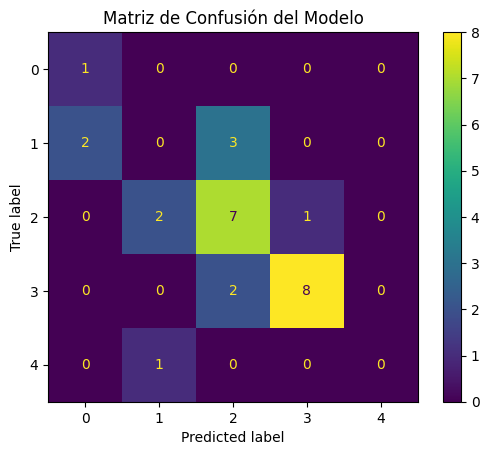

In [89]:

# Calcular la matriz de confusión
cm = confusion_matrix(Y_test, prediccion)

# Crear la visualización de la matriz de confusión
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot()
plt.title('Matriz de Confusión del Modelo')
plt.show()

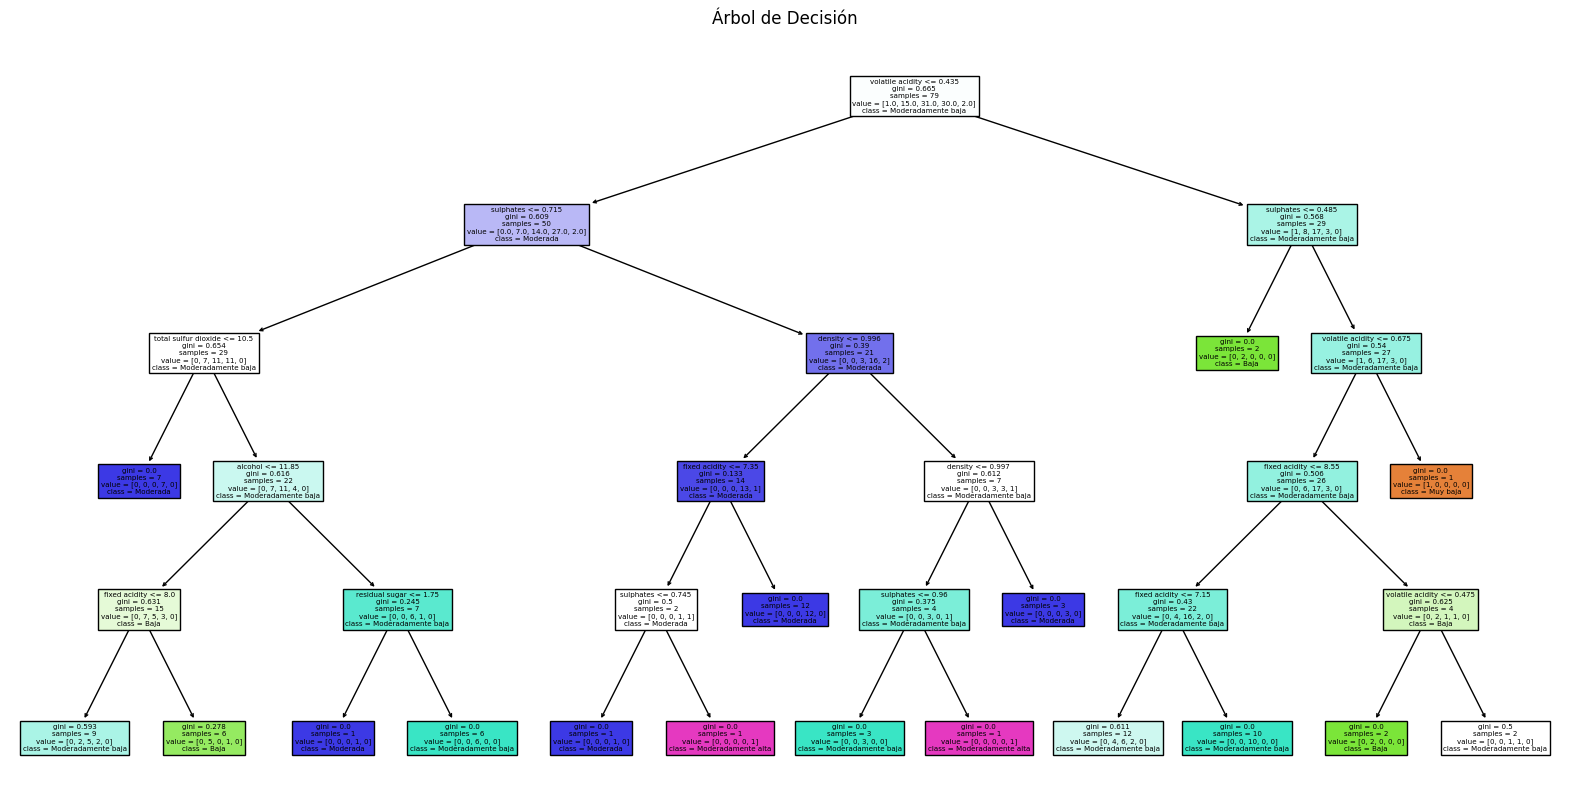

In [90]:
# Visualización del árbol de decisión
plt.figure(figsize=(20, 10))  # Tamaño de la figura
plot_tree(modelo_arbol, filled=True, feature_names=X.columns, class_names=['Muy baja', 'Baja', 'Moderadamente baja', 'Moderada', 'Moderadamente alta', 'Alta', 'Muy alta', 'Excepcional'])  # Visualización del árbol
plt.title('Árbol de Decisión')  # Título del gráfico
plt.show()  # Mostrar el gráfico


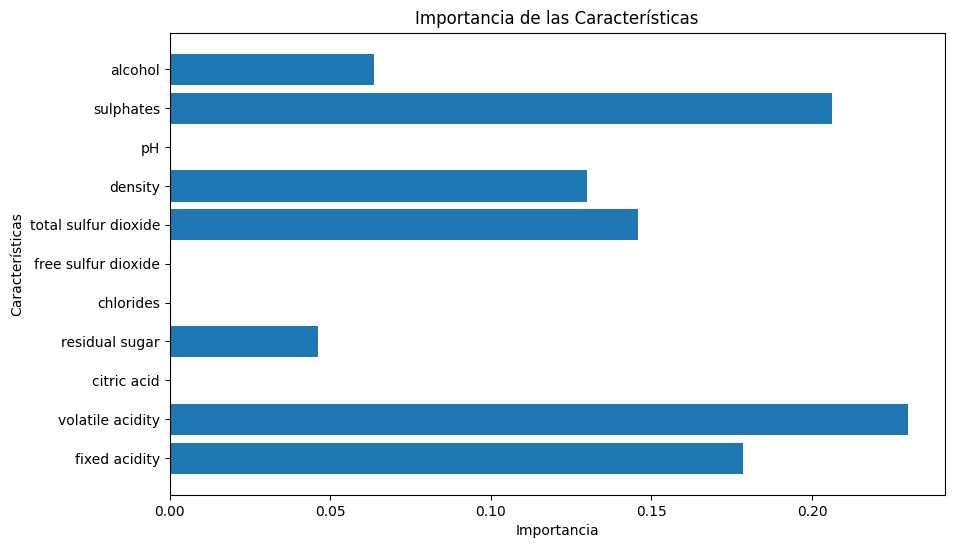

In [91]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, modelo_arbol.feature_importances_)
plt.title('Importancia de las Características')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

# Punto 8.
Interpretar, analizar y documentar los resultados obtenidos..

## Interpretación y Análisis de Datos:

* Para la interpretación de los datos, comenzamos cargando el conjunto de datos que contiene las variables relacionadas con la presencia o ausencia de enfermedades cardíacas en los individuos.

* En segundo lugar, realizamos la exploración de datos (EDA), que incluye varias etapas. Inicialmente, cargamos y leemos el dataset.

* En tercer lugar, llevamos a cabo la exploración univariante, bivariante y multivariante mediante el uso de diagramas de dispersión y correlación.

* En cuarto lugar, detectamos todos los valores atípicos utilizando diagramas de caja y los eliminamos mediante el rango intercuartílico.

* Después de identificar los datos atípicos o nulos, avanzamos a la siguiente fase.

## Pre-procesamiento de Datos:
* Para comenzar, se cargaron las librerías necesarias para manipular el archivo de datos y aplicar las métricas del modelo de árboles de decisión. Luego, se cargó el archivo y se visualizó una muestra de los datos para entender su estructura y contenido. Posteriormente, se obtuvieron medidas de tendencia central y dispersión para comprender la distribución de los datos.
* Se identificaron valores faltantes y atípicos en los datos. No  se imputaron los valores faltantes, ya que no habian, para los valores atípicos, se utilizaron diagramas de caja y se filtraron solo aquellos que se consideraron anormales en las variables trabajadas.

## Selección de Características Relevantes:
Se seleccionaron las características relevantes, enfocándose en la calidad como variable dependiente. Luego, se dividió el conjunto de datos en entrenamiento y prueba (75% - 25%) y se configuró un modelo de árbol de decisión con diferentes hiperparámetros.

## Entrenamiento del Modelo:
Se entrenó el modelo y se realizaron predicciones en el conjunto de prueba. Se evaluó el desempeño del modelo utilizando métricas como precisión y recall para cada clase de calidad de vino. Se observaron disminuciones significativas en la precisión y recall a medida que aumentaba la calidad del vino.

## Visualización de Resultados:
Se generaron tres gráficos para visualizar los resultados: un árbol de decisión para comprender las decisiones del modelo, una matriz de confusión para analizar los tipos de errores del modelo, y un gráfico de la importancia de características para identificar las características más importantes para la calidad del vino.